In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
density_idm=np.load('/home/tianyu/code/SUMO-changing-lane-agent/Main7500Merge1250omar_average_density30_1.2_idm_freedepart_pos800_f100_inter100_w1800.npy')
flow_idm=np.load('/home/tianyu/code/SUMO-changing-lane-agent/Main7500Merge1250omar_average_flow30_1.2_idm_freedepart_pos800_f100_inter100_w1800.npy')


density_secrm=np.load('/home/tianyu/code/SUMO-changing-lane-agent/Main7500Merge1250omar_average_density30_1.2_Krauss_freedepart_pos800_f100_inter100_w1800.npy')
flow_secrm=np.load('/home/tianyu/code/SUMO-changing-lane-agent/Main7500Merge1250omar_average_flow30_1.2_Krauss_freedepart_pos800_f100_inter100_w1800.npy')

density_gipps=np.load('/home/tianyu/code/SUMO-changing-lane-agent/Main7500Merge1250omar_average_density30_1.2_Krauss_freedepart_pos800_f100_inter100_w1800.npy')
flow_gipps=np.load('/home/tianyu/code/SUMO-changing-lane-agent/Main7500Merge1250omar_average_flow30_1.2_Krauss_freedepart_pos800_f100_inter100_w1800.npy')


In [7]:
cop1_idm_flow=np.load('/home/tianyu/code/SUMO-changing-lane-agent/Main7500Merge1250omar_average_flow30_1.2_idm_lcCoop1_freedepart_pos800_f100_inter100_w1800.npy')
cop1_idm_density=np.load('/home/tianyu/code/SUMO-changing-lane-agent/Main7500Merge1250omar_average_density30_1.2_idm_lcCoop1_freedepart_pos800_f100_inter100_w1800.npy')


cop05_idm_flow=np.load('/home/tianyu/code/SUMO-changing-lane-agent/Main7500Merge1250omar_average_flow30_1.2_idm_lcCoop0.5_freedepart_pos800_f100_inter100_w1800.npy')
cop05_idm_density=np.load('/home/tianyu/code/SUMO-changing-lane-agent/Main7500Merge1250omar_average_density30_1.2_idm_lcCoop0.5_freedepart_pos800_f100_inter100_w1800.npy')

cop0_idm_flow=np.load('/home/tianyu/code/SUMO-changing-lane-agent/Main7500Merge1250omar_average_flow30_1.2_idm_lcCoop0_freedepart_pos800_f100_inter100_w1800.npy')
cop0_idm_density=np.load('/home/tianyu/code/SUMO-changing-lane-agent/Main7500Merge1250omar_average_density30_1.2_idm_lcCoop0_freedepart_pos800_f100_inter100_w1800.npy')



In [8]:
strafu1_idm_flow=np.load('/home/tianyu/code/SUMO-changing-lane-agent/Main7500Merge1250omar_average_flow30_1.2_idm_lcCoop0_lcStrategic-1_freedepart_pos800_f100_inter100_w1800.npy')
strafu1_idm_density=np.load('/home/tianyu/code/SUMO-changing-lane-agent/Main7500Merge1250omar_average_density30_1.2_idm_lcCoop0_lcStrategic-1_freedepart_pos800_f100_inter100_w1800.npy')


stra1_idm_flow=np.load('/home/tianyu/code/SUMO-changing-lane-agent/Main7500Merge1250omar_average_flow30_1.2_idm_lcCoop0_lcStrategic1_freedepart_pos800_f100_inter100_w1800.npy')
stra1_idm_density=np.load('/home/tianyu/code/SUMO-changing-lane-agent/Main7500Merge1250omar_average_density30_1.2_idm_lcCoop0_lcStrategic1_freedepart_pos800_f100_inter100_w1800.npy')

stra05_idm_flow=np.load('/home/tianyu/code/SUMO-changing-lane-agent/Main7500Merge1250omar_average_flow30_1.2_idm_lcCoop0_lcStrategic05_freedepart_pos800_f100_inter100_w1800.npy')
stra05_idm_density=np.load('/home/tianyu/code/SUMO-changing-lane-agent/Main7500Merge1250omar_average_density30_1.2_idm_lcCoop0_lcStrategic05_freedepart_pos800_f100_inter100_w1800.npy')



In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def plot_fundamental_diagram(*data_sets):
    plt.figure(figsize=(6, 4))
    
    for data, target_speed, label in data_sets:
        density_data, flow_data = zip(*data)
        
        def func(x, a, b, c, d):
            return a * x**3 + b * x**2 + c * x + d
        
        params, covariance = curve_fit(func, density_data, flow_data)
        a, b, c, d = params
        x_fit = np.linspace(min(density_data), max(density_data), 100)
        y_fit = func(x_fit, a, b, c, d)
        
        color = 'blue' if label == 'idm' else 'red'
        color= 'blue' if label=='cooperation=0' else 'red'
        color = 'blue' if label == 'stra=-1' else ('green' if label == 'stra=0.5' else 'red')

        
        plt.scatter(density_data, flow_data, label='Target Speed: {}m/s - {}'.format(target_speed, label), s=10, color=color)
    
    plt.xlabel('Density (veh/km)')
    plt.ylabel('Flow (veh/h)')
    plt.xlim(0, 180)
    plt.ylim(0, 12000)
    plt.title('Fundamental Diagram')
    plt.legend()
    plt.grid(True)
    plt.show()

data_l_30_idm=list(zip(200*density_idm,5000*flow_idm))

data_l_30_gipps=list(zip(200*density_gipps,5000*flow_gipps))

cop0_30_idm=list(zip(200*cop0_idm_density,5000*cop0_idm_flow))

cop05_30_idm=list(zip(200*cop05_idm_density,5000*cop05_idm_flow))

cop1_30_idm=list(zip(200*cop1_idm_density,5000*cop1_idm_flow))


strafu1_30_idm=list(zip(200*strafu1_idm_density,5000*strafu1_idm_flow))

stra1_30_idm=list(zip(200*stra1_idm_density,5000*stra1_idm_flow))

stra05_30_idm=list(zip(200*stra05_idm_density,5000*stra05_idm_flow))



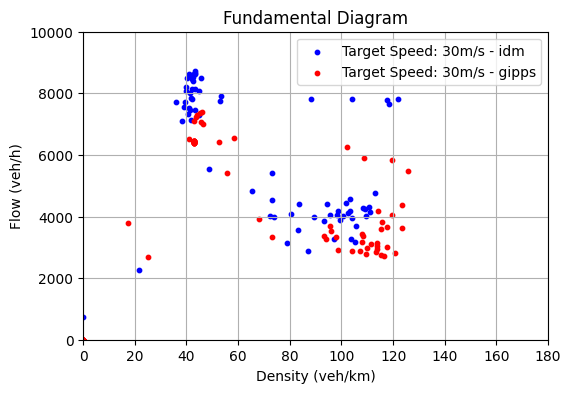

In [5]:
plot_fundamental_diagram((3*np.array(data_l_30_idm),30,'idm'),(3*np.array(data_l_30_gipps),30,'gipps'))

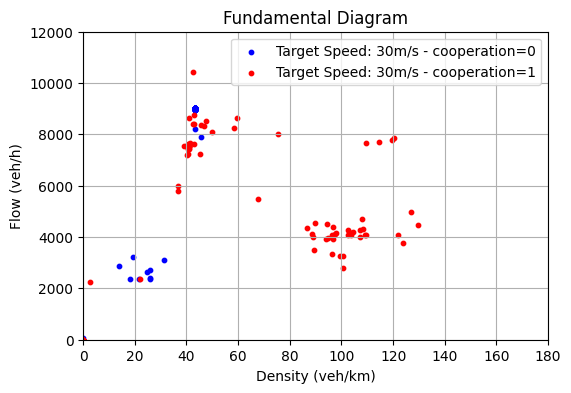

In [12]:
plot_fundamental_diagram((3*np.array(cop0_30_idm),30,'cooperation=0'),(3*np.array(cop1_30_idm),30,'cooperation=1'))

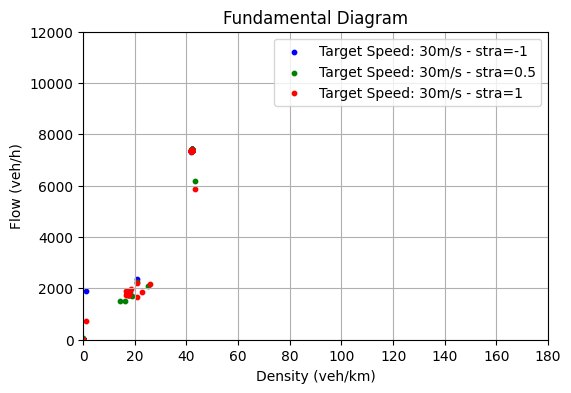

In [12]:
plot_fundamental_diagram((3*np.array(strafu1_30_idm),30,'stra=-1'),(3*np.array(stra05_30_idm),30,'stra=0.5'),(3*np.array(stra1_30_idm),30,'stra=1'))

In [13]:
flow_data_idm = [pair[1] for pair in data_l_30_idm]
flow_data_gipps = [pair[1] for pair in data_l_30_gipps]

flow_data_cop0 = [pair[1] for pair in cop0_30_idm]
flow_data_cop05 = [pair[1] for pair in cop05_30_idm]
flow_data_cop1 = [pair[1] for pair in cop1_30_idm]

flow_data_strafu1 = [pair[1] for pair in strafu1_30_idm]
flow_data_stra1 = [pair[1] for pair in stra1_30_idm]
flow_data_stra05 = [pair[1] for pair in stra05_30_idm]


Text(0, 0.5, 'Flow (veh/h)')

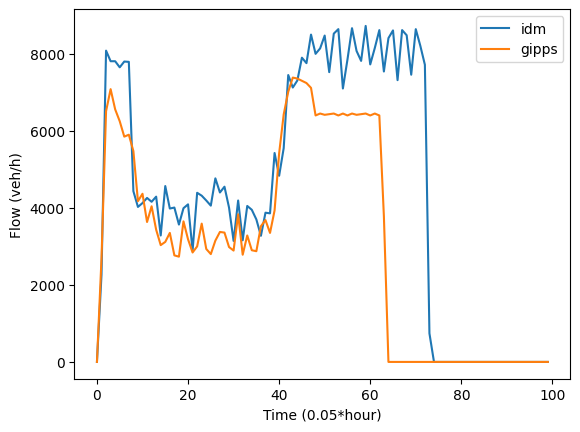

In [9]:
plt.plot(3*np.array(flow_data_idm),label='idm')
plt.plot(3*np.array(flow_data_gipps),label='gipps')
# 修改横轴刻度
new_ticks = np.array(flow_data_idm) * 0.05
# plt.xticks(np.arange(len(flow_data_idm)), new_ticks)

plt.xlabel('Time (0.05*hour)')
plt.legend()
plt.ylabel('Flow (veh/h)')

Text(0, 0.5, 'flow(veh/h)')

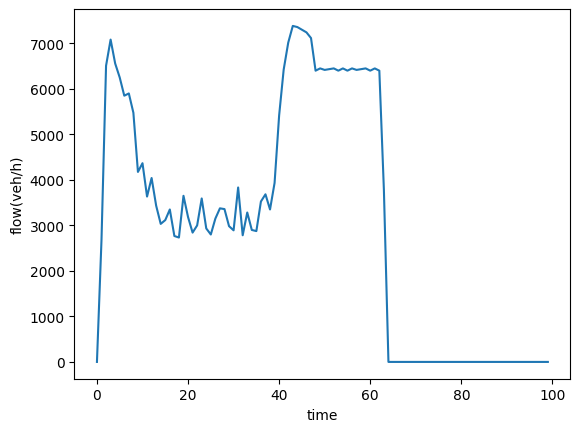

In [37]:
plt.plot(3*np.array(flow_data_gipps))
plt.xlabel('time')
plt.ylabel('flow(veh/h)')

Text(0, 0.5, 'Flow (veh/h)')

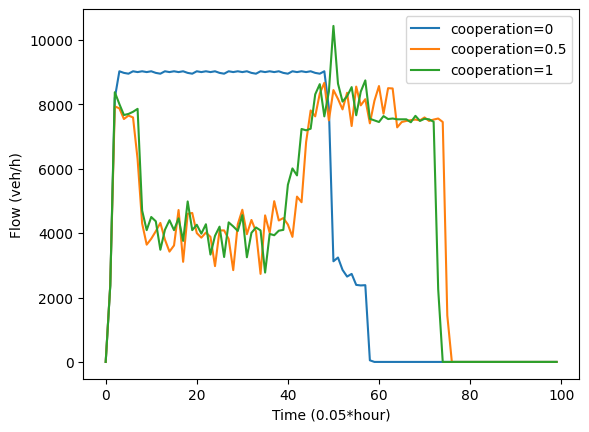

In [23]:
plt.plot(3*np.array(flow_data_cop0),label='cooperation=0')
plt.plot(3*np.array(flow_data_cop05),label='cooperation=0.5')
plt.plot(3*np.array(flow_data_cop1),label='cooperation=1')

# 修改横轴刻度
# plt.xticks(np.arange(len(flow_data_idm)), new_ticks)

plt.xlabel('Time (0.05*hour)')
plt.legend()
plt.ylabel('Flow (veh/h)')

Text(0, 0.5, 'Flow (veh/h)')

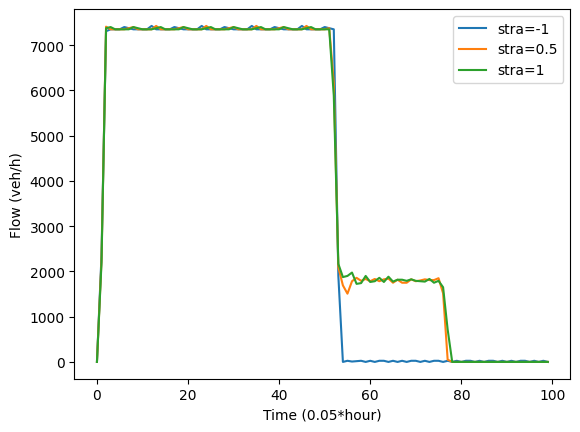

In [14]:
plt.plot(3*np.array(flow_data_strafu1),label='stra=-1')
plt.plot(3*np.array(flow_data_stra05),label='stra=0.5')
plt.plot(3*np.array(flow_data_stra1),label='stra=1')

# 修改横轴刻度
# plt.xticks(np.arange(len(flow_data_idm)), new_ticks)

plt.xlabel('Time (0.05*hour)')
plt.legend()
plt.ylabel('Flow (veh/h)')